In [2]:
from fastai.vision import *


In [3]:
folder = 'dollar'
file = '100_dollar.csv'

In [4]:
folder = 'euros'
file = '100_euros.csv'

In [5]:
folder = 'rmb'
file = '100_rmb.csv'

In [6]:
folder = 'AUD(Australlia)'
file = '100_AUD(Australlia).csv'

In [7]:
folder = 'pkr'
file = '100_pkr.csv'

In [8]:
folder = '100_Ind(India)'
file = '100_Ind(India).csv'

In [9]:
folder = 'Riyal(Saudi)'
file = '100_Riyal(Saudi).csv'

In [10]:
folder = 'Dirham(UAE)'
file = '100_Dirham(UAE).csv'

In [11]:
folder = 'pound(GBP)'
file = '100_pound(GBP).csv'

In [5]:
folder = 'BDT(Bangladesh)'
file = '100_BDT(Bangladesh).csv'

In [12]:

path = Path('data/Currency')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:

path.ls()

[WindowsPath('data/Currency/100_BDT(Bangladesh).csv'),
 WindowsPath('data/Currency/AUD(Australlia)'),
 WindowsPath('data/Currency/BDT(Bangladesh)'),
 WindowsPath('data/Currency/Dirham(UAE)'),
 WindowsPath('data/Currency/Dollar(US)'),
 WindowsPath('data/Currency/export.pkl'),
 WindowsPath('data/Currency/Ind(India)'),
 WindowsPath('data/Currency/models'),
 WindowsPath('data/Currency/PKR(Pakistan)'),
 WindowsPath('data/Currency/pound(GBP)'),
 WindowsPath('data/Currency/Riyal(Saudi)'),
 WindowsPath('data/Currency/Riyal(Saudi_Arabia)'),
 WindowsPath('data/Currency/RMB(China)')]

In [14]:
classes = ['AUD(Australlia)','BDT(Bangladesh)','Dirham(UAE)' , 'Dollar(US)' , 'Ind(India)' , 'PKR(Pakistan)' , 'Riyal(Saudi_Arabia)' , 'RMB(China)']


In [7]:

download_images(path/file, dest, max_pics=200)

SystemExit: 1

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224,bs=32 ,num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes

['AUD(Australlia)',
 'BDT(Bangladesh)',
 'Dirham(UAE)',
 'Dollar(US)',
 'Ind(India)',
 'PKR(Pakistan)',
 'RMB(China)',
 'Riyal(Saudi_Arabia)']

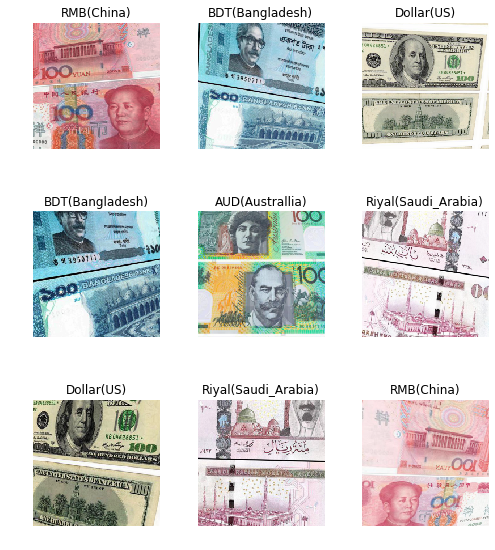

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['AUD(Australlia)',
  'BDT(Bangladesh)',
  'Dirham(UAE)',
  'Dollar(US)',
  'Ind(India)',
  'PKR(Pakistan)',
  'RMB(China)',
  'Riyal(Saudi_Arabia)'],
 8,
 640,
 160)

In [21]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)


In [16]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,accuracy,time
0,0.003721,0.000012,1.000000,00:30
1,0.006373,0.000027,1.000000,00:30
2,0.004601,0.000029,1.000000,00:31
3,0.003233,0.000024,1.000000,00:30


In [17]:
learn.save('currency-1')

In [18]:
learn.unfreeze()


In [21]:
learn.lr_find()
#learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


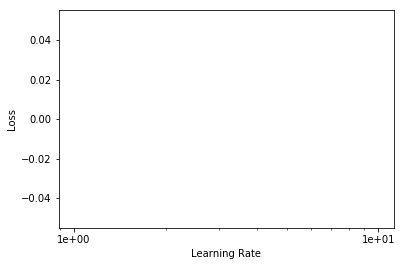

In [22]:

# If the plot is not showing try to give a start and end learning rate
#learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.000984,0.000029,1.000000,00:34
1,0.000740,0.000003,1.000000,00:34


In [24]:
learn.save('currency-2')


In [22]:
learn.load('currency-1');


In [26]:
interp = ClassificationInterpretation.from_learner(learn)


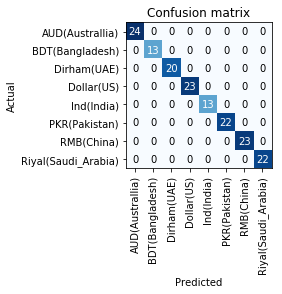

In [27]:
interp.plot_confusion_matrix()


In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


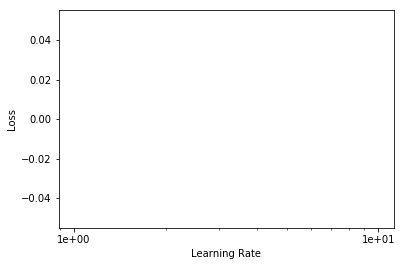

In [29]:
learn.recorder.plot()

In [30]:
learn.export()

In [23]:
defaults.device = torch.device('cpu')


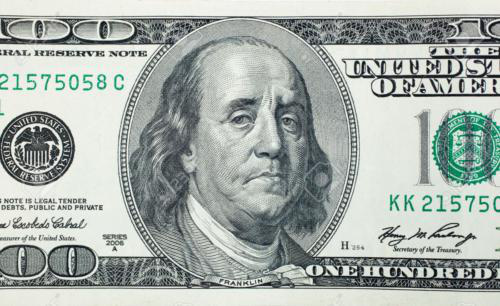

In [29]:
img = open_image(path/'D:/New Code/Fastai/original images/Dollar(US)/00000004.jpg')
img

In [30]:
learn = load_learner(path)

In [31]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Dollar(US)